In [ ]:
#importing all essential libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Description of dataset

1.filename: Name of the audio file associated with each observation (e.g.,
blues.00000.0.wav).

2.length: Duration of the audio sample in milliseconds.

3.chroma_stft_mean and chroma_stft_var: Mean and variance of the chroma short-time Fourier transform (STFT).

4.rms_mean and rms_var: Mean and variance of the Root Mean Square (RMS) energy.

5.spectral_centroid_mean and spectral_centroid_var: Mean and variance of the spectral centroid.

6.spectral_bandwidth_mean and spectral_bandwidth_var: Mean and variance of spectral bandwidth.

7.rolloff_mean and rolloff_var: Mean and variance of spectral roll-off frequency.

8.zero_crossing_rate_mean and zero_crossing_rate_var: Mean and variance of zero-crossing rate.

9.harmony_mean and harmony_var: Mean and variance of harmony.

10.perceptr_mean and perceptr_var: Mean and variance of perceptual spectral contrast.

11.tempo: Estimated tempo of the song in beats per minute (BPM).

12.mfcc1_mean to mfcc20_mean: Mean values of the first 20 Mel-frequency cepstral coefficients (MFCCs).

13.mfcc1_var to mfcc20_var: Variance of the first 20 MFCCs.

14.label: The genre label for each audio sample (e.g., blues, classical, jazz).





In [ ]:
#import the dataset
dt=pd.read_csv("/content/features_3_sec.csv")
dt

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [ ]:
#Total number of Rows and Colomns
dt.shape

(9990, 60)

In [ ]:
#Read the first 5 rows of dataset
dt.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
#Understanding the central Tendency
dt.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [ ]:
#check if any null values present
dt.isnull()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9986,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9987,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9988,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#total no. of null values in each column
dt.isnull().sum()

,0
filename,0
length,0
chroma_stft_mean,0
chroma_stft_var,0
rms_mean,0
rms_var,0
spectral_centroid_mean,0
spectral_centroid_var,0
spectral_bandwidth_mean,0
spectral_bandwidth_var,0


In [ ]:
#Getting more info about dataset
dt.info


<bound method DataFrame.info of                filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1     blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2     blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3     blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4     blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986   rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987   rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988   rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989   rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean  spectral_centroid_var  \
0     0.003521             1773.065032          167541.630869   
1     0.001450             1816.693777           90525.690866   
2     0.004620             1788.539719          111407.437613   
3     0.002448             1655.289045          111952.284517   
4     0.001701             1630.656199           79667.267654   
...        ...                     ...                    ...   
9985  0.000097             1499.083005          164266.886443   
9986  0.000088             1847.965128          281054.935973   
9987  0.000701             1346.157659          662956.246325   
9988  0.000320             2084.515327          203891.039161   
9989  0.000067             1634.330126          411429.169769   

      spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0                 1972.744388           117335.771563  ...   39.687145   
1                 2010.051501            65671.875673  ...   64.748276   
2                 2084.565132            75124.921716  ...   67.336563   
3                 1960.039988            82913.639269  ...   47.739452   
4                 1948.503884            60204.020268  ...   30.336359   
...                       ...                     ...  ...         ...   
9985              1718.707215            85931.574523  ...   42.485981   
9986              1906.468492            99727.037054  ...   32.415203   
9987              1561.859087           138762.841945  ...   78.228149   
9988              2018.366254            22860.992562  ...   28.323744   
9989              1867.422378           119722.211518  ...   38.801735   

      mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0       -3.241280   36.488243     0.722209   38.099152    -5.050335   
1       -6.055294   40.677654     0.159015   51.264091    -2.837699   
2       -1.768610   28.348579     2.378768   45.717648    -1.938424   
3       -3.841155   28.337118     1.218588   34.770935    -3.580352   
4        0.664582   45.880913     1.689446   51.363583    -3.392489   
...           ...         ...          ...         ...          ...   
9985    -9.094270   38.326839    -4.246976   31.049839    -5.625813   
9986   -12.375726   66.418587    -3.081278   54.414265   -11.960546   
9987    -2.524483   21.778994     4.809936   25.980829     1.775686   
9988    -5.363541   17.209942     6.462601   21.442928     2.354765   
9989   -11.598399   58.983097    -0.178517   55.761299    -6.903252   

      mfcc19_var  mfcc20_mean  mfcc20_var  label  
0      33.618073    -0.243027   43.771767  blues  
1      97.030830     5.784063   59.943081  blues  
2      53.050835     2.517375   33.105122  blues  
3      50.836224     3.630866   32.023678  blues  
4      26.738789     0.536961   29.146694  blues  
...          ...          ...         ...    ...  
9985   48.804092     1.818823   38.966969   rock  
9986   63.452255     0.428857   18.697033   rock  
9987   48.582378    -0.29

In [ ]:
#Getting no of unique values in length column
dt["length"].nunique()

1

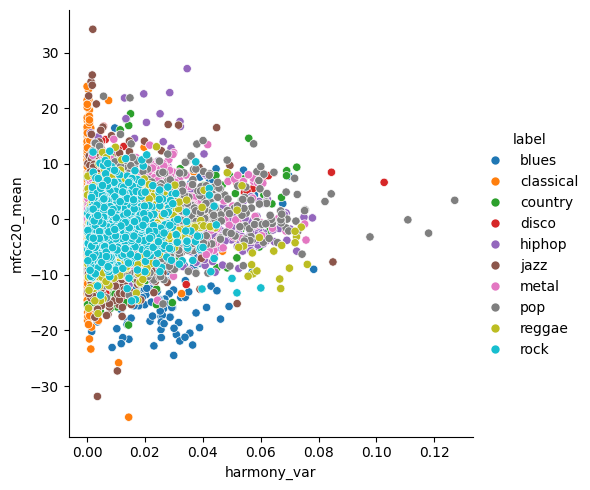

In [ ]:
# Let's visualize all the music genres plotted according to two random features. We use the seaborn library to make a scatterplot of the two random features.
feature_names = dt.keys()[:-1]
x_name = random.choice(feature_names)
y_name = random.choice(feature_names)

while x_name == y_name:
  y_name = random.choice(feature_names)

sns.relplot(x = x_name, y = y_name, hue = "label", data = dt);


In [ ]:
#make a copy of dataset to work on
ndt=dt.copy()


In [ ]:
#here we will work on ndt it will be copy dataset .
#here remove all non float values except genre so our length and name id column will get dropped.
non_floats = []
for col in ndt.iloc[:,:-1]:
    if ndt[col].dtypes != "float64":
        non_floats.append(col)
ndt = ndt.drop(columns=non_floats)

In [ ]:
ndt

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,8.479527e+05,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,1.170890e+06,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,2.602871e+06,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,4.968878e+05,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


What are the Most Common Genres in the Dataset?

In [ ]:
ndt["label"].value_counts()

,count
label,
blues,1000
jazz,1000
metal,1000
pop,1000
reggae,1000
disco,999
classical,998
hiphop,998
rock,998


In [ ]:
#Categorisation of data
#feature catergorization
#determine x and y
x=ndt.iloc[:,0:57].values   #:, means all values
y=ndt.iloc[:,57].values

In [ ]:
#Label encoding
!pip install --user scikit-learn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [ ]:
#building machine learning models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#model selection
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [ ]:
#splittinX
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

Which Machine Learning Model gives the highest accuracy, Precision , F1 Score, Recall?

In [ ]:
#Accuracy, Precision, F1 score,Recall,Confusion Matrix using Guassian Naive Bayes Algorithm
accuracy_list=[]
model_name=[]
gaussian  = GaussianNB()
gaussian.fit(x_train,y_train)
Y_pred = gaussian.predict(x_test)
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2 )

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
accuracy_list.append(accuracy)
model_name.append("GNB")
print("accuracy_Naive Bayes: %.3f" %accuracy)

accuracy_Naive Bayes: 0.425


In [ ]:
pre_nb=precision_score(y_test,Y_pred,average='weighted')
print("precision_Naive Bayes: %.3f" %pre_nb)
recall_score_nb=recall_score(y_test,Y_pred,average='weighted')
print("recall_Naive Bayes: %.3f" %recall_score_nb)
f1_score_nb=f1_score(y_test,Y_pred,average='weighted')
print("f1_score_Naive Bayes: %.3f" %f1_score_nb)
confusion_matrix_nb=confusion_matrix(y_test,Y_pred)
print("confusion_matrix_Naive Bayes:\n", confusion_matrix_nb)

precision_Naive Bayes: 0.439
recall_Naive Bayes: 0.425
f1_score_Naive Bayes: 0.402
confusion_matrix_Naive Bayes:
 [[ 64  18  39   5   3  30 101   0  21   6]
 [  1 262   3   1   0   7  12   1   3   5]
 [ 19  16 103  47   5  11  71   1  24  16]
 [  9   2  10 120  11   3  92   8  21  14]
 [  7   0  27  57  75   1  55  25  47   7]
 [ 24  63  13  33   0  68  52   8   7  27]
 [  1   2   2  16   8   2 274   1   2   4]
 [  1   2   6  76  11   3  19 140  23   6]
 [ 32   1  31  36  31   2   8  27 142   8]
 [  3  12  38  42  10   6 134   6  21  27]]


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import svm


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Accuracy, Precision, F1 score,Recall,Confusion Matrix using Logistic Regression Algorithm
model1=LogisticRegression(max_iter=500,random_state=70)
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
accuracy_list.append(accuracy)
model_name.append("LR")

0.30430430430430433


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
pre_lr=precision_score(y_test,y_pred,average='weighted')
print("precision_Logistic Regression: %.3f" %pre_lr)
recall_score_lr=recall_score(y_test,y_pred,average='weighted')
print("recall_Logistic Regression: %.3f" %recall_score_lr)
f1_score_lr=f1_score(y_test,y_pred,average='weighted')
print("f1_score_Logistic Regression: %.3f" %f1_score_lr)
confusion_matrix_lr=confusion_matrix(y_test,y_pred)
print("confusion_matrix_Logistic Regression:\n", confusion_matrix_lr)

precision_Logistic Regression: 0.296
recall_Logistic Regression: 0.304
f1_score_Logistic Regression: 0.269
confusion_matrix_Logistic Regression:
 [[ 50  39   4  34   6  38  73  16  26   1]
 [  8 141   4   2   0   8 128   0   4   0]
 [ 23  35  37  47   4  48  42  40  28   9]
 [ 15   4  14  74  10  16  71  64  21   1]
 [ 11   7  15  55  25   6  47  87  46   2]
 [ 41  48  10  18   2  73  64  32   1   6]
 [  1  11   7  45   1   6 235   4   2   0]
 [  4   5   6  34  13  23  22 152  25   3]
 [ 40  11  19  32  27   9  13  46 118   3]
 [ 14  18  11  62   4  28  83  53  19   7]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Accuracy, Precision, F1 score,Recall,Confusion Matrix using DecisionTree Classifier Algorithm
model2=DecisionTreeClassifier(random_state=42)
model2.fit(x_train,y_train)
y_dpred=model2.predict(x_test)
accuracy1=accuracy_score(y_test,y_dpred)
print(accuracy1)
accuracy_list.append(accuracy1)
model_name.append("DTC")

0.6489823156489823


In [ ]:
pre_dtc=precision_score(y_test,y_dpred,average='weighted')
print("precision_Decision Tree Classifier: %.3f" %pre_dtc)
recall_score_dtc=recall_score(y_test,y_dpred,average='weighted')
print("recall_Decision Tree Classifier: %.3f" %recall_score_dtc)
f1_score_dtc=f1_score(y_test,y_dpred,average='weighted')
print("f1_score_Decision Tree Classifier: %.3f" %f1_score_dtc)
confusion_matrix_dtc=confusion_matrix(y_test,y_dpred)
print("confusion_matrix_Decision Tree Classifier:\n", confusion_matrix_dtc)

precision_Decision Tree Classifier: 0.650
recall_Decision Tree Classifier: 0.649
f1_score_Decision Tree Classifier: 0.649
confusion_matrix_Decision Tree Classifier:
 [[175   1  25  11   5  11  17   1  17  24]
 [  1 263   7   0   1  17   0   0   1   5]
 [ 32   6 164  18   6  21   6   7  13  40]
 [  9   4  10 163  28   5   7  11  24  29]
 [  7   1   7  25 198   1   5  24  25   8]
 [ 14  28  23   4   2 194   3   3   8  16]
 [ 11   0   3   6  14   6 234   1   6  31]
 [  2   2  11  21  17   7   0 198  20   9]
 [ 12   2  14  21  21   7   4  13 214  10]
 [ 18   6  28  32   7  18  27   6  15 142]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Accuracy, Precision, F1 score,Recall,Confusion Matrix using RandomForestClassifier Algorithm
model3=RandomForestClassifier(n_estimators=100,random_state=1)
model3.fit(x_train,y_train)
y_rpred=model3.predict(x_test)
accuracy2=accuracy_score(y_test,y_rpred)
accuracy_list.append(accuracy2)
model_name.append("RFC")
print(accuracy2)

0.8638638638638638


In [ ]:
pre_rfc=precision_score(y_test,y_rpred,average='weighted')
print("precision_Random Forest Classifier: %.3f" %pre_rfc)
recall_score_rfc=recall_score(y_test,y_rpred,average='weighted')
print("recall_Random Forest Classifier: %.3f" %recall_score_rfc)
f1_score_rfc=f1_score(y_test,y_rpred,average='weighted')
print("f1_score_Random Forest Classifier: %.3f" %f1_score_rfc)
confusion_matrix_rfc=confusion_matrix(y_test,y_rpred)
print("confusion_matrix_Random Forest Classifier:\n", confusion_matrix_rfc)

precision_Random Forest Classifier: 0.864
recall_Random Forest Classifier: 0.864
f1_score_Random Forest Classifier: 0.862
confusion_matrix_Random Forest Classifier:
 [[265   1   3   4   1   7   4   0   2   0]
 [  0 286   3   0   0   6   0   0   0   0]
 [ 16   1 267   3   1  10   3   1   7   4]
 [  4   4   5 248   9   1   3   2   5   9]
 [  1   1   3   9 253   0   5  17   8   4]
 [  5  16  12   3   0 258   0   1   0   0]
 [  2   1   1   2   5   2 286   0   1  12]
 [  0   2   9   9   6   1   0 250   7   3]
 [  5   2  12   5   6   2   0   9 275   2]
 [ 14   3  17  21   5  15  17   2   4 201]]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
#Accuracy, Precision, F1 score,Recall,Confusion Matrix using AdaboostClassifier Algorithm
model_ada=AdaBoostClassifier(model2,learning_rate=1.0,random_state=42)
model_ada.fit(x_train,y_train)
y_apred=model_ada.predict(x_test)
accu=accuracy_score(y_test,y_apred)
accuracy_list.append(accu)
model_name.append("ABC")
print(accu)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.6866866866866866


In [ ]:
pre_dtc=precision_score(y_test,y_apred,average='weighted')
print("precision_AdaBoost Classifier: %.3f" %pre_dtc)
recall_score_dtc=recall_score(y_test,y_apred,average='weighted')
print("recall_AdaBoost Classifier: %.3f" %recall_score_dtc)
f1_score_dtc=f1_score(y_test,y_apred,average='weighted')
print("f1_score_AdaBoost Classifier: %.3f" %f1_score_dtc)
confusion_matrix_dtc=confusion_matrix(y_test,y_apred)
print("confusion_matrix_AdaBoost Classifier:\n", confusion_matrix_dtc)


precision_AdaBoost Classifier: 0.688
recall_AdaBoost Classifier: 0.687
f1_score_AdaBoost Classifier: 0.687
confusion_matrix_AdaBoost Classifier:
 [[190   0  27   7  10  17   8   2  13  13]
 [  0 256   8   0   0  23   2   0   1   5]
 [ 24   3 185  18   7  26   5   6  14  25]
 [ 16   3  12 172  16   5  10  10  21  25]
 [  8   0   9  14 197   2  10  30  22   9]
 [  8  15  27   5   5 216   1   7   2   9]
 [  7   0   2   9   7   2 256   0   1  28]
 [  1   5  14  12  10   7   0 213  14  11]
 [ 13   2  17  15  26   3   5   9 211  17]
 [ 21   3  31  20   7  16  22   8   9 162]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#Accuracy, Precision, F1 score,Recall,Confusion Matrix using Gradient BoostingClassifier Algorithm
model_gra=GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=42)
model_gra.fit(x_train,y_train)
y_gpred=model_gra.predict(x_test)
accu_g=accuracy_score(y_test,y_gpred)
print(accu_g)
accuracy_list.append(accu_g)
model_name.append("GBC")

0.8218218218218218


In [ ]:
pre_gbc=precision_score(y_test,y_gpred,average='weighted')
print("Gradient_Boosting Classifier: %.3f" %pre_gbc)
recall_score_gbc=recall_score(y_test,y_apred,average='weighted')
print("Gradient_Boosting Classifier: %.3f" %recall_score_gbc)
f1_score_gbc=f1_score(y_test,y_apred,average='weighted')
print("Gradient_Boosting Classifier: %.3f" %f1_score_gbc)
confusion_matrix_gbc=confusion_matrix(y_test,y_gpred)
print("confusion_matrix_Gradient_Boosting Classifier:\n", confusion_matrix_gbc)

Gradient_Boosting Classifier: 0.822
Gradient_Boosting Classifier: 0.687
Gradient_Boosting Classifier: 0.687
confusion_matrix_Gradient_Boosting Classifier:
 [[243   1  10   8   5   7   4   0   4   5]
 [  0 275   4   0   0  10   0   0   1   5]
 [ 19   2 244   6   0  13   5   3   9  12]
 [  3   3   8 232  16   3   3   7   8   7]
 [  4   1   5   5 242   1   5  17  15   6]
 [  2  17  19   1   0 254   0   0   0   2]
 [  5   1   1   8   6   1 269   0   0  21]
 [  0   2   8  15   8   4   0 238   8   4]
 [  6   1  12   7   9   0   0   9 262  12]
 [ 16   4  20  18   5  11  13   4   4 204]]


In [ ]:
#Accuracy, Precision, F1 score,Recall,Confusion Matrix using SVC Algorithm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm = SVC(kernel='rbf')

# Hyperparameter tuning
param_grid = {'C': [0.5,1,10], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Evaluate model
best_model = grid_search.best_estimator_
y_predsvm = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_predsvm)
acc_svm=accuracy_score(y_test,y_predsvm)
print("Accuracy:",acc_svm)
model_name.append("SVM")
accuracy_list.append(acc_svm)

Accuracy: 0.314647981314648


In [ ]:
pre_svm=precision_score(y_test,y_predsvm,average='weighted')
print("Gradient_Boosting Classifier: %.3f" %pre_svm)
recall_score_svm=recall_score(y_test,y_predsvm,average='weighted')
print("Gradient_Boosting Classifier: %.3f" %recall_score_svm)
f1_score_svm=f1_score(y_test,y_predsvm,average='weighted')
print("Gradient_Boosting Classifier: %.3f" %f1_score_svm)
confusion_matrix_svm=confusion_matrix(y_test,y_predsvm)
print("confusion_matrix_Gradient_Boosting Classifier:\n", confusion_matrix_svm)

In [ ]:
#Accuracy, Precision, F1 score,Recall,Confusion Matrix using xgboost Algorithm
import xgboost as xgb
xgb_model=xgb.XGBClassifier()
xgb_model.fit(x_train,y_train)
y_predxgb=xgb_model.predict(x_test)
acc_xgb=accuracy_score(y_test,y_predxgb)
print("Accuracy:",acc_xgb)
model_name.append("XGB")
accuracy_list.append(acc_xgb)

In [ ]:
pre_xgb=precision_score(y_test,y_predxgb,average='weighted')
print("xgboost Classifier: %.3f" %pre_xgb)
recall_score_xgb=recall_score(y_test,y_predxgb,average='weighted')
print("xgboost Classifier: %.3f" %recall_score_xgb)
f1_score_xgb=f1_score(y_test,y_predxgb,average='weighted')
print("xgboost Classifier: %.3f" %f1_score_xgb)
confusion_matrix_xgb=confusion_matrix(y_test,y_predxgb)
print("confusion_matrix_xgboost Classifier:\n", confusion_matrix_xgb)

xgboost Classifier: 0.887
xgboost Classifier: 0.886
xgboost Classifier: 0.886
confusion_matrix_xgboost Classifier:
 [[263   1   5   5   2   5   3   0   0   3]
 [  0 280   2   0   0   8   0   0   0   5]
 [ 11   2 275   2   1   8   0   0   4  10]
 [  6   4   6 248   7   1   1   4   6   7]
 [  2   1   4   4 269   1   3   8   7   2]
 [  1  11  12   1   0 268   1   0   0   1]
 [  4   1   1   2   6   1 287   0   0  10]
 [  0   1   6   5   6   2   0 256   6   5]
 [  6   2   6   4  10   1   0   8 277   4]
 [ 10   5  13   9   4   8  10   3   4 233]]


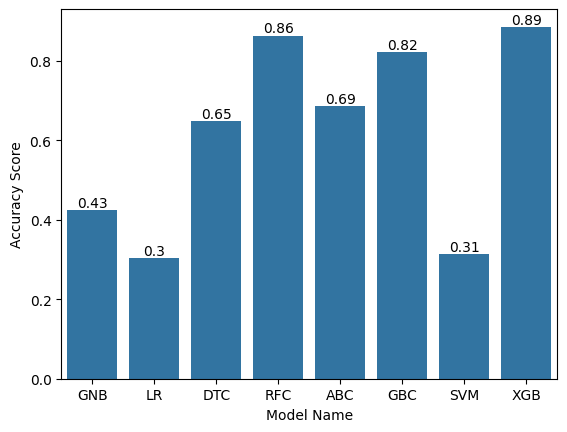

In [ ]:
#Comparing the accuracy of all the models and determining the model with greatest accuracy
new_df=pd.DataFrame({
    "Model Name":model_name,"Accuracy Score":accuracy_list
})
bar_plot=sns.barplot(new_df,x="Model Name",y="Accuracy Score")
for index,row in new_df.iterrows():
  bar_plot.text(index,row["Accuracy Score"],round(row["Accuracy Score"],2),color="black",ha="center",va="bottom")
plt.show()

On which top 5 features accuracy is highly dependent?

In [ ]:
imp_list=xgb_model.feature_importances_
model_imp=pd.Series(imp_list,ndt.columns[:-1])
top_5=model_imp.nlargest(5)
print(top_5)

perceptr_var               0.072947
spectral_bandwidth_mean    0.057957
chroma_stft_mean           0.040678
mfcc4_mean                 0.037323
rms_var                    0.032699
dtype: float32


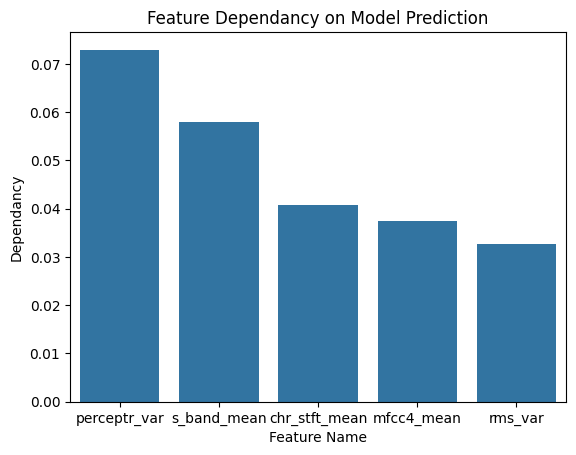

In [ ]:
#Comparing the above top 5 feature dependency
feat_name=["perceptr_var","s_band_mean","chr_stft_mean","mfcc4_mean","rms_var"]
new_df2=pd.DataFrame({
    "feat_name":feat_name,"top_5":top_5
})
bar_plot2=sns.barplot(x=feat_name,y=top_5)
plt.xlabel("Feature Name")
plt.ylabel("Dependancy")
plt.title("Feature Dependancy on Model Prediction")
#for index,row in new_df2.iterrows():
 # bar_plot2.text(index,row["top_5"],round(row["top_5"],2),color="black",ha=",va="top")
plt.show()

Are There Any Correlations Between Features?

In [ ]:
correlation = ndt.iloc[:,0:57].corr()
correlation

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
chroma_stft_mean,1.000000,-0.443757,0.424706,0.243647,0.534670,0.251985,0.464617,0.100909,0.526881,0.138394,...,0.228293,-0.264815,-0.103968,-0.273841,0.168254,-0.308342,-0.062985,-0.313233,0.193666,-0.363354
chroma_stft_var,-0.443757,1.000000,-0.078410,0.251900,-0.208136,0.276964,-0.031197,0.291007,-0.141792,0.330930,...,-0.221620,0.296099,0.111544,0.303262,-0.171744,0.295359,0.107008,0.277295,-0.173398,0.287195
rms_mean,0.424706,-0.078410,1.000000,0.553770,0.470781,0.241796,0.495142,0.085760,0.500178,0.157281,...,0.055563,-0.032953,-0.013952,-0.041470,0.087615,-0.046180,0.024552,-0.062662,0.082251,-0.103519
rms_var,0.243647,0.251900,0.553770,1.000000,0.327809,0.509235,0.383329,0.285950,0.350716,0.377474,...,-0.064570,0.159390,0.144238,0.144163,-0.004785,0.102019,0.136798,0.095054,0.015085,0.073571
spectral_centroid_mean,0.534670,-0.208136,0.470781,0.327809,1.000000,0.476959,0.890382,0.021120,0.974360,0.172380,...,0.116866,-0.025006,0.026879,-0.018358,0.177934,-0.006376,0.018651,-0.011018,0.191512,-0.051205
spectral_centroid_var,0.251985,0.276964,0.241796,0.509235,0.476959,1.000000,0.556491,0.614254,0.492965,0.780308,...,-0.134131,0.125906,0.134869,0.115752,-0.045517,0.093684,0.123857,0.074366,-0.012324,0.052981
spectral_bandwidth_mean,0.464617,-0.031197,0.495142,0.383329,0.890382,0.556491,1.000000,0.223836,0.951000,0.406680,...,0.012459,-0.023060,0.089523,-0.021857,0.084331,-0.005564,0.074453,-0.020422,0.133895,-0.063954
spectral_bandwidth_var,0.100909,0.291007,0.085760,0.285950,0.021120,0.614254,0.223836,1.000000,0.070097,0.891339,...,-0.180031,0.101519,0.093049,0.078486,-0.122140,0.051146,0.094140,0.022953,-0.091730,0.015888
rolloff_mean,0.526881,-0.141792,0.500178,0.350716,0.974360,0.492965,0.951000,0.070097,1.000000,0.237905,...,0.098611,-0.032600,0.035871,-0.026397,0.158802,-0.012166,0.033071,-0.020990,0.182626,-0.065557
rolloff_var,0.138394,0.330930,0.157281,0.377474,0.172380,0.780308,0.406680,0.891339,0.237905,1.000000,...,-0.188433,0.112760,0.099636,0.095440,-0.110838,0.069654,0.094853,0.044384,-0.090789,0.031120


<Axes: >

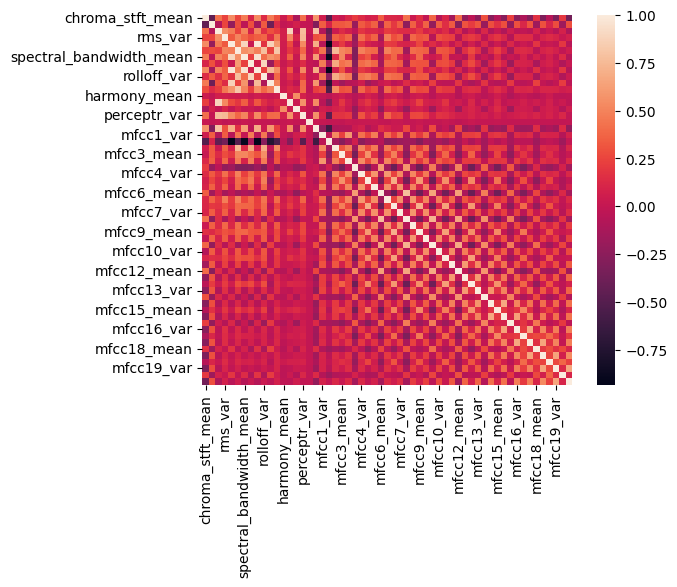

In [ ]:
sns.heatmap(correlation,square=True)

CONCLUSION:

In [ ]:
#In this project,we have build a model which predicts genre of the music based on some features of the music.
#from above analysis we concluded that among naive bais,logistic regression, decision tree classifier,
 #random forest classifier, adaboost classifier, xgboost classifier
#,gradient boosting classifier the most accurate model is xgboost classifier with accuracy of almost 89% .
#Using the model we analysed the top five features on which the accuracy of this model are most dependent.
#Among these the topmost was perceptr_var followed by ms_var,chroma_stft_mean,rms_mean,mfcc4_mean.